In [86]:
def importlibrerias():
    
    '''Importamos las librerias '''
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix

print(importlibrerias.__doc__)

Importamos las librerias 


In [87]:
def carga():
            
    '''Cargamos el dataset con extension de archivo csv'''

df = pd.read_csv("CollegeDistance.csv" )
df.head(10)

print(carga.__doc__)


Cargamos el dataset con extension de archivo csv


In [88]:
df

,Unnamed: 0,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
0,1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
1,2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
2,3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,9391,male,afam,56.529999,no,no,yes,no,6.6,8.89,0.8,0.25751,13,high,west
4735,9401,male,afam,59.770000,no,no,yes,no,6.6,8.89,0.8,0.25751,15,high,west
4736,9411,male,other,43.169998,no,no,yes,no,6.6,8.89,0.8,0.25751,12,high,west
4737,9421,male,afam,49.970001,yes,yes,yes,no,6.6,8.89,0.8,0.25751,16,high,west


In [89]:
def DatosNulos():
    
    '''Distribuir los valores alfanumericos del dataset escogiddo en numericos por medio  de la tecnica de reemplazo de valores'''
    
d1 = {'other': 0, 'afam': 1, 'hispanic':2}
df['ethnicity'] = df['ethnicity'].map(d1)
d2 = {'female': 0, 'male': 1}
df['gender'] = df['gender'].map(d2)
d3 = {'yes': 0, 'no': 1}
df['fcollege'] = df['fcollege'].map(d3)
d4 = {'yes': 0, 'no': 1}
df['mcollege'] = df['mcollege'].map(d4)
d6 = {'yes': 0, 'no': 1}
df['home'] = df['home'].map(d6)
d7 = {'yes': 0, 'no': 1}
df['urban'] = df['urban'].map(d7)
d8 = {'high': 0, 'low': 1}
df['income'] = df['income'].map(d8)
d9 = {'other': 0, 'west': 1}
df['region'] = df['region'].map(d9)

print(df)

print(DatosNulos.__doc__)

      Unnamed: 0  gender  ethnicity      score  fcollege  mcollege  home  \
0              1       1          0  39.150002         0         1     0   
1              2       0          0  48.869999         1         1     0   
2              3       1          0  48.740002         1         1     0   
3              4       1          1  40.400002         1         1     0   
4              5       0          0  40.480000         1         1     1   
...          ...     ...        ...        ...       ...       ...   ...   
4734        9391       1          1  56.529999         1         1     0   
4735        9401       1          1  59.770000         1         1     0   
4736        9411       1          0  43.169998         1         1     0   
4737        9421       1          1  49.970001         0         0     0   
4738        9431       1          1  53.410000         1         0     0   

      urban  unemp  wage  distance  tuition  education  income  region  
0         0   

In [90]:
def defCaracteristicas():
    
    '''Elegimos las caracteristicas'''
features = ['gender', 'ethnicity', 'score', 'mcollege','home','urban','unemp','wage','distance','tuition','education','region']
X = df[features]
print(defCaracteristicas.__doc__)

Elegimos las caracteristicas


In [91]:
def defObjetivo():
    
    '''Elegimos nuestra objetivo, es decir la columna con los valores que intentamos predecir.'''
y = df['income']
print(defObjetivo.__doc__)

Elegimos nuestra objetivo, es decir la columna con los valores que intentamos predecir.


In [92]:
def mostrarvalores():
    
    ''' Imprimimos nuestros valores de X y de y '''
    
print(X, y, sep='\n\n')
print(mostrarvalores.__doc__)

      gender  ethnicity      score  mcollege  home  urban  unemp  wage  \
0          1          0  39.150002         1     0      0    6.2  8.09   
1          0          0  48.869999         1     0      0    6.2  8.09   
2          1          0  48.740002         1     0      0    6.2  8.09   
3          1          1  40.400002         1     0      0    6.2  8.09   
4          0          0  40.480000         1     1      0    5.6  8.09   
...      ...        ...        ...       ...   ...    ...    ...   ...   
4734       1          1  56.529999         1     0      1    6.6  8.89   
4735       1          1  59.770000         1     0      1    6.6  8.89   
4736       1          0  43.169998         1     0      1    6.6  8.89   
4737       1          1  49.970001         0     0      1    6.6  8.89   
4738       1          1  53.410000         0     0      1    6.6  8.89   

      distance  tuition  education  region  
0          0.2  0.88915         12       0  
1          0.2  0.889

In [93]:
def crearFuncion():
    
    '''Crecion de la funcion para entrenar el modelo tomando el 70 porciento de datos del dataset y el 30 para las pruebas del azar'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
print(crearFuncion.__doc__)

Crecion de la funcion para entrenar el modelo tomando el 70 porciento de datos del dataset y el 30 para las pruebas del azar


In [94]:
def CrearArb():
    
    ''' Creamos  el àrbol de decisiòn'''
dtree= DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
dtree = dtree.fit(X, y)

print(CrearArb.__doc__)  

 Creamos  el àrbol de decisiòn


In [95]:
 def GuarArb():
        
    ''' Guardamos el  arbol mediante una imagen '''
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('arbol.png')

print(GuarArb.__doc__) 

 Guardamos el  arbol mediante una imagen 


<IPython.core.display.Javascript object>


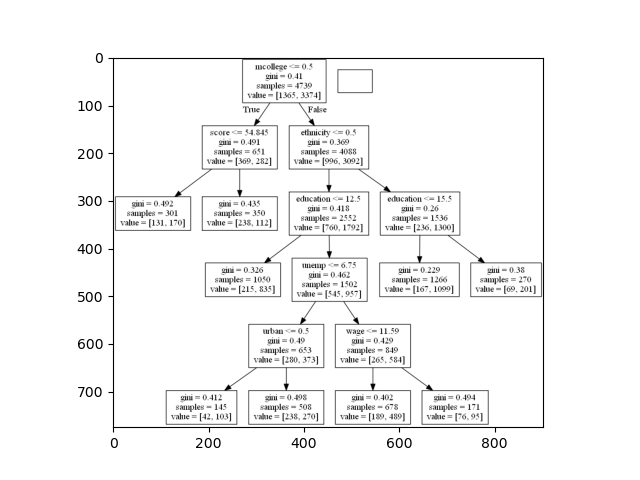

Creamos la funciòn para mostrar la imagen de nuestro àrbol


In [97]:
def imprimirArb():
    '''Creamos la funciòn para mostrar la imagen de nuestro àrbol'''
img = pltimg.imread('arbol.png')
imgplot = plt.imshow(img)
plt.show()

print(imprimirArb.__doc__) 

In [98]:
def Array():
    
    ''' Procedemos a crear un array que se entedera con los valores actuales y predichos del dataset'''

data = {'y_Actual':    y,
        'y_Predicted': y }

print(Array.__doc__)

 Procedemos a crear un array que se entedera con los valores actuales y predichos del dataset


<IPython.core.display.Javascript object>


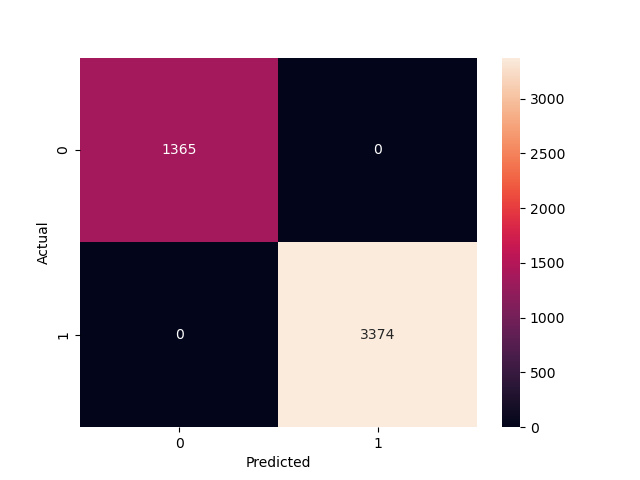

 Procedemos a crear un array que se entedera con los valores actuales y predichos del dataset


In [84]:
def crearMC():
    
    ''' Creamos nuestra matriz de confusion con los valores impresos en el punto anterior '''

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

print(Array.__doc__)

In [99]:
def metAccu():
    
    '''Evaluacion del modelo  mediante las metricas, primer modelo a evaluar Accurry'''

print("Accuracy:", metrics.accuracy_score(y_test, y_pred),'\n')
    
print(metAccu.__doc__)

NameError: name 'metrics' is not defined